# 📊 Análisis del Impacto de las Categorías de Platillos
Este notebook analiza los datos de ventas por categoría de platillos para entender su impacto en el restaurante. Incluye gráficos y resumen para construir un dashboard de BI.

In [ ]:
!pip install openpyxl seaborn matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargando archivo desde Excel local
df_ventas = pd.read_excel("Datos_Restaurante_Ejemplo_6meses.xlsx", sheet_name="Ventas")
df_detalles = pd.read_excel("Datos_Restaurante_Ejemplo_6meses.xlsx", sheet_name="DetallesVenta")
df_platillos = pd.read_excel("Datos_Restaurante_Ejemplo_6meses.xlsx", sheet_name="Platillos")

# Utilizando tecnicas de mineria (Agrupamiento)
Se utilizó para consolidar las ventas por categorías de platillos y por meses del año.

In [ ]:
# Uniendo tablas
df = df_detalles.merge(df_ventas, on='id_venta')
df = df.merge(df_platillos, on='id_platillo')
df['fecha'] = pd.to_datetime(df['fecha'])
df.head()

# Creando algunas gráficas usando tablas creadas

          fecha  mes nombre_mes
94   2025-01-31    1    January
143  2025-01-08    1    January
141  2025-01-02    1    January
131  2025-01-09    1    January
123  2025-01-10    1    January
...         ...  ...        ...
1227 2025-06-21    6       June
1232 2025-06-01    6       June
1233 2025-06-05    6       June
1234 2025-06-24    6       June
1247 2025-06-03    6       June

[166 rows x 3 columns]


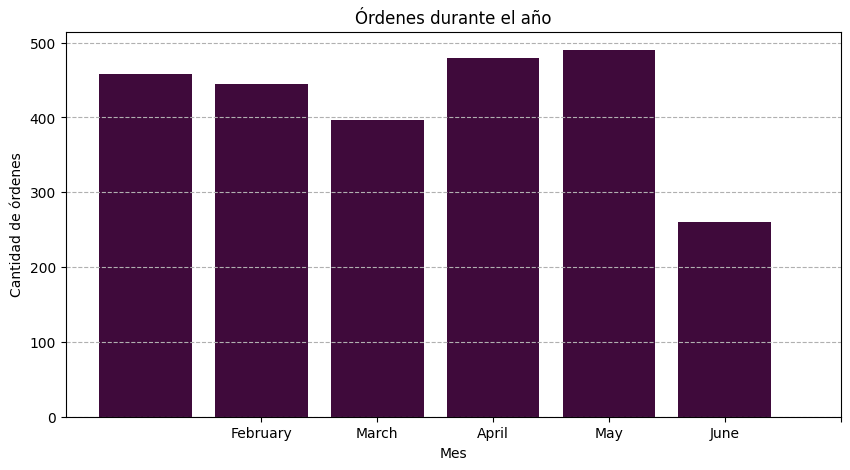

In [29]:
# Grafica de barras -- Órdenes hasta el mes de Junio
df['mes'] = df['fecha'].dt.month
df['nombre_mes'] = df['fecha'].dt.month_name()
print(df[['fecha', 'mes', 'nombre_mes']].drop_duplicates().sort_values(by='mes'))

ventas_mensuales = df.groupby(['mes', 'nombre_mes'])['cantidad'].sum().reset_index()
ventas_mensuales = ventas_mensuales[ventas_mensuales['mes'] <= 6]

plt.figure(figsize=(10, 5))
plt.bar(ventas_mensuales['nombre_mes'], ventas_mensuales['cantidad'], color="#3F0A3BFF")
plt.xticks(ventas_mensuales['mes'])
plt.title("Órdenes durante el año")
plt.xlabel("Mes")
plt.ylabel("Cantidad de órdenes")
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

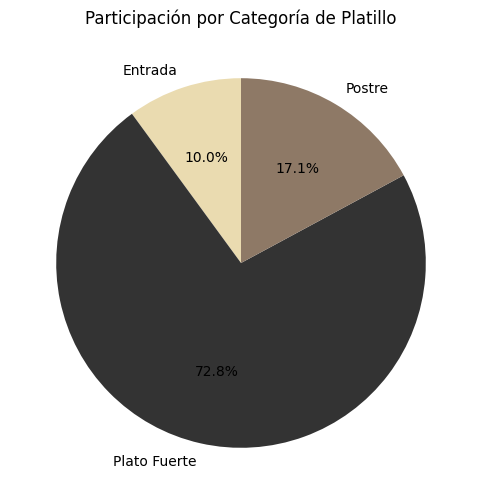

In [30]:
# Grafica de pastel -- Porcenatje por categoría de platillo
ventas_categoria = df.groupby('categoria')['cantidad'].sum()
ventas_categoria.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90, colors=['#EADBB0', '#333333', '#8E7966'])
plt.title('Participación por Categoría de Platillo')
plt.ylabel('')
plt.show()

## Agrupando para crear tabla de ventas
Utilizamos el agrupamiento para crear la tabla de número de ventaspor categoria y su porcentaje

In [27]:
resumen = df.groupby('categoria')['cantidad'].sum().reset_index()
resumen.columns = ['Categoría', 'N° Ventas']
resumen['% Ventas'] = 100 * resumen['N° Ventas'] / resumen['N° Ventas'].sum()
resumen.loc[len(resumen.index)] = ['TOTAL', resumen['N° Ventas'].sum(), 100.0]
resumen

,Categoría,N° Ventas,% Ventas
0,Entrada,254,10.047468
1,Plato Fuerte,1841,72.824367
2,Postre,433,17.128165
3,TOTAL,2528,100.000000


## KPIs por categoría


In [31]:
for i, row in resumen.iterrows():
    if row['Categoría'] != 'TOTAL':
        print(f"✅ {row['Categoría']}: {row['% Ventas']:.2f}% del total de órdenes")

✅ Entrada: 10.05% del total de órdenes
✅ Plato Fuerte: 72.82% del total de órdenes
✅ Postre: 17.13% del total de órdenes


In [28]:
resumen.to_csv("resumen_categorias.csv", index=False)
ventas_mensuales.to_csv("ventas_mensuales.csv", index=False)